# Matplotlib

Biblioteca de criação de gráficos - muito boa por sinal, usei bastante antes de começar o curso - que permite criar gráficos simples e avançados.

Há 2 métodos principais de plotar gráficos:

1. API Pyplot: plotar gráficos estilo matlab, menos flexível.
2. OOP: plotar gráficos com orientação à objetos. Muda um pouco e é mais flexível 

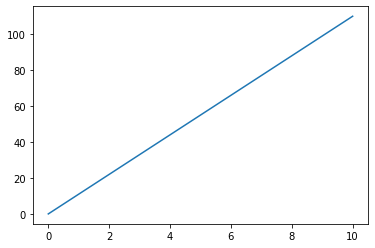

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

x = np.arange(0, 11, 1)
y = x * 11

# api pyplot
plt.plot(x, y)


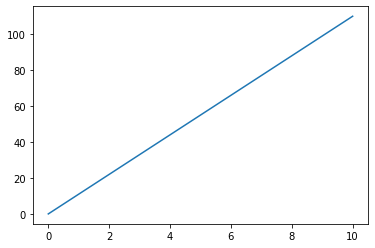

In [2]:
# Usando OOP

fig, ax = plt.subplots()
ax.plot(x, y)


## Anatomia de um plot

Figura é a parte externa, eixo é a interna. Os dados ficam nos eixos, os complementos na figura.

![](./matplotlib-anatomy-of-a-plot.png)

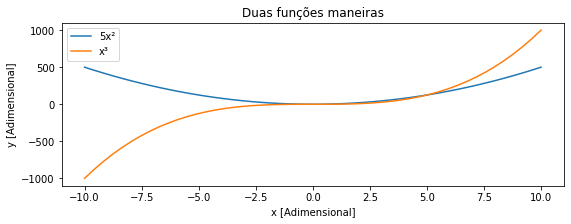

In [3]:
x = np.linspace(-10, 10, 50)
y1 = np.power(x, 2) * 5
y2 = np.power(x, 3)

fig, ax = plt.subplots(figsize=(9, 3))

ax.plot(x, y1, label=r'5x²')
ax.plot(x, y2, label=r'x³')

ax.set(title='Duas funções maneiras',
       xlabel='x [Adimensional]',
       ylabel='y [Adimensional]')

ax.legend(loc='best')


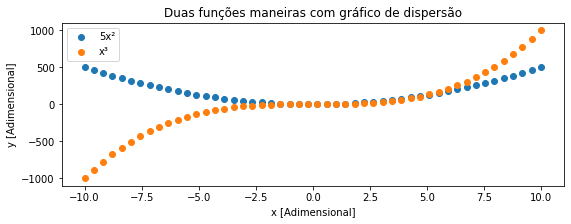

In [4]:
fig, ax = plt.subplots(figsize=(9, 3))

ax.scatter(x, y1, label=r'5x²')
ax.scatter(x, y2, label=r'x³')

ax.set(title='Duas funções maneiras com gráfico de dispersão',
       xlabel='x [Adimensional]',
       ylabel='y [Adimensional]')

ax.legend(loc='best')


[Text(0.5, 1.0, 'Doces da nittasi'),
 Text(0.5, 0, 'Doces'),
 Text(0, 0.5, 'Preço (R$)')]

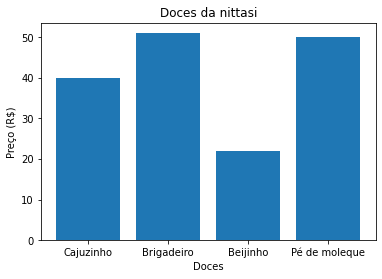

In [5]:
doces = {"Cajuzinho": 40,
         "Brigadeiro": 51,
         "Beijinho": 22,
         "Pé de moleque": 50}

fig, ax = plt.subplots()

ax.bar(doces.keys(), doces.values())
ax.set(title="Doces da nittasi",
       xlabel="Doces",
       ylabel="Preço (R$)")


[Text(0.5, 1.0, 'Doces da nittasi'),
 Text(0, 0.5, 'Doces'),
 Text(0.5, 0, 'Preço (R$)')]

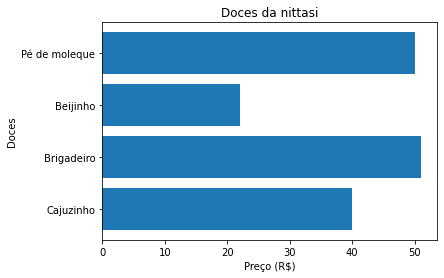

In [6]:
fig, ax = plt.subplots()

ax.barh(list(doces.keys()), list(doces.values()))
ax.set(title="Doces da nittasi",
       ylabel="Doces",
       xlabel="Preço (R$)")


(array([  4.,  20.,  47., 151., 237., 253., 177.,  89.,  19.,   3.]),
 array([-3.49916242, -2.81623107, -2.13329972, -1.45036838, -0.76743703,
        -0.08450568,  0.59842567,  1.28135702,  1.96428837,  2.64721972,
         3.33015107]),
 <BarContainer object of 10 artists>)

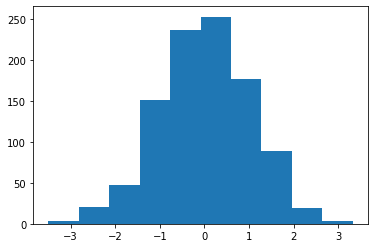

In [7]:
x = np.random.randn(1000)

fig, ax = plt.subplots()
ax.hist(x)


(array([ 2.,  3., 13., 18., 21., 17., 14.,  8.,  2.,  2.]),
 array([-2.5129959 , -1.99442682, -1.47585775, -0.95728867, -0.43871959,
         0.07984948,  0.59841856,  1.11698763,  1.63555671,  2.15412578,
         2.67269486]),
 <BarContainer object of 10 artists>)

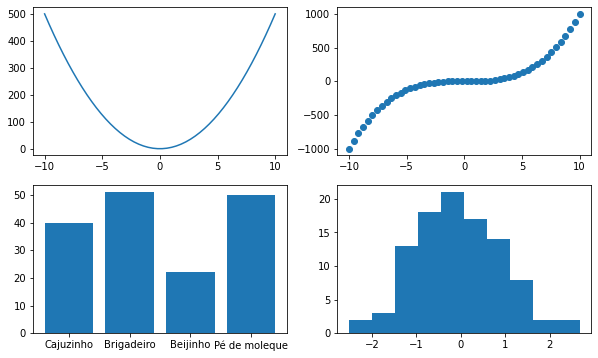

In [8]:
x = np.linspace(-10, 10, 50)
y1 = np.power(x, 2) * 5
y2 = np.power(x, 3)
x_norm = np.random.randn(100)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))
ax1.plot(x, y1)
ax2.scatter(x, y2)
ax3.bar(doces.keys(), doces.values())
ax4.hist(x_norm)


## Plotando à partir de dataframes

Pandas fornece um wrapper pra matplotlib, assim dá pra chamar o método `plot()` direto de um dataframe.


In [9]:
car_sales = pd.read_csv('../6_Pandas/car-sales.csv')
car_sales


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [10]:
car_sales['Date'] = pd.date_range('1/1/2021', periods=len(car_sales))
car_sales


,Make,Colour,Odometer (KM),Doors,Price,Date
0,Toyota,White,150043,4,"$4,000.00",2021-01-01
1,Honda,Red,87899,4,"$5,000.00",2021-01-02
2,Toyota,Blue,32549,3,"$7,000.00",2021-01-03
3,BMW,Black,11179,5,"$22,000.00",2021-01-04
4,Nissan,White,213095,4,"$3,500.00",2021-01-05
5,Toyota,Green,99213,4,"$4,500.00",2021-01-06
6,Honda,Blue,45698,4,"$7,500.00",2021-01-07
7,Honda,Blue,54738,4,"$7,000.00",2021-01-08
8,Toyota,White,60000,4,"$6,250.00",2021-01-09
9,Nissan,White,31600,4,"$9,700.00",2021-01-10


In [11]:
car_sales['Price'] = car_sales['Price'].str.replace('[\$\,\.]', '')
car_sales['Price'] = car_sales['Price'].str[:-2]  # removendo dois 0's extras
car_sales


/tmp/ipykernel_9801/1394438645.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales['Price'] = car_sales['Price'].str.replace('[\$\,\.]', '')


,Make,Colour,Odometer (KM),Doors,Price,Date
0,Toyota,White,150043,4,4000,2021-01-01
1,Honda,Red,87899,4,5000,2021-01-02
2,Toyota,Blue,32549,3,7000,2021-01-03
3,BMW,Black,11179,5,22000,2021-01-04
4,Nissan,White,213095,4,3500,2021-01-05
5,Toyota,Green,99213,4,4500,2021-01-06
6,Honda,Blue,45698,4,7500,2021-01-07
7,Honda,Blue,54738,4,7000,2021-01-08
8,Toyota,White,60000,4,6250,2021-01-09
9,Nissan,White,31600,4,9700,2021-01-10


In [12]:
car_sales['Price'] = car_sales['Price'].astype(int)
car_sales['Total'] = car_sales['Price'].cumsum()
car_sales


,Make,Colour,Odometer (KM),Doors,Price,Date,Total
0,Toyota,White,150043,4,4000,2021-01-01,4000
1,Honda,Red,87899,4,5000,2021-01-02,9000
2,Toyota,Blue,32549,3,7000,2021-01-03,16000
3,BMW,Black,11179,5,22000,2021-01-04,38000
4,Nissan,White,213095,4,3500,2021-01-05,41500
5,Toyota,Green,99213,4,4500,2021-01-06,46000
6,Honda,Blue,45698,4,7500,2021-01-07,53500
7,Honda,Blue,54738,4,7000,2021-01-08,60500
8,Toyota,White,60000,4,6250,2021-01-09,66750
9,Nissan,White,31600,4,9700,2021-01-10,76450


<AxesSubplot:xlabel='Date'>

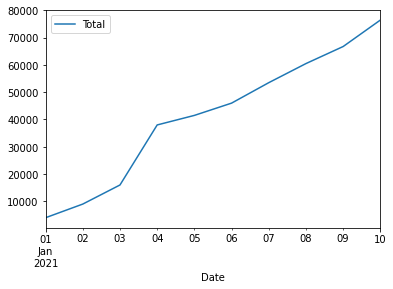

In [13]:
car_sales.plot(x='Date', y='Total')


<AxesSubplot:xlabel='Odometer (KM)', ylabel='Price'>

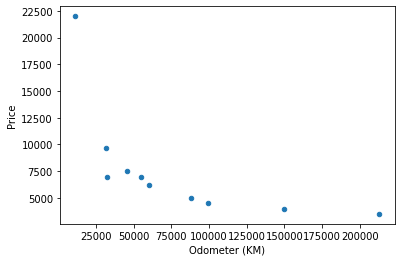

In [14]:
car_sales.plot(x='Odometer (KM)', y='Price', kind='scatter')


<AxesSubplot:xlabel='Make'>

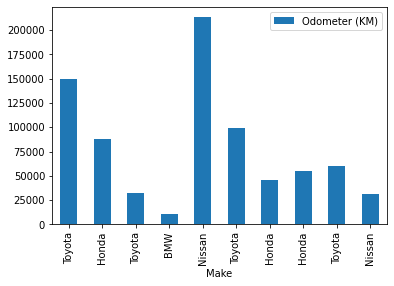

In [15]:
car_sales.plot(x='Make', y='Odometer (KM)', kind='bar')


<AxesSubplot:ylabel='Frequency'>

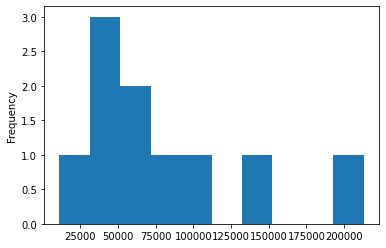

In [16]:
car_sales['Odometer (KM)'].plot.hist()


## Customizando plots

Como dito anteriormente, o modelo OO fornece facilidades pra customizar os plots sobre o modelo pyplot. Em linhas gerais:

- Usar o pyplot em plots mais simples
- Usar o OO em plots complexos

In [20]:
heart_disease = pd.read_csv('./heart-disease.csv')
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
over_50 = heart_disease[heart_disease['age'] > 50]
over_50


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<AxesSubplot:xlabel='age', ylabel='chol'>

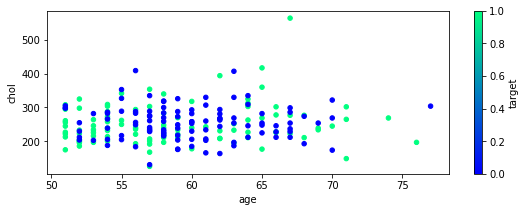

In [27]:
# Usando API pyplot
fig, ax = plt.subplots(figsize=(9, 3))
over_50.plot(kind='scatter',
             x='age',
             y='chol',
             c='target',
             ax=ax,
             cmap='winter')


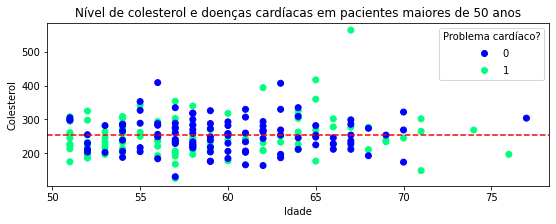

In [36]:
fig, ax = plt.subplots(figsize=(9, 3))
sc = ax.scatter(x=over_50['age'],
                y=over_50['chol'],
                c=over_50['target'],
                cmap='winter')

ax.set(title='Nível de colesterol e doenças cardíacas em pacientes maiores de 50 anos',
       ylabel='Colesterol',
       xlabel='Idade')

# * faz o unpacking dos `legend_elements()`
ax.legend(*sc.legend_elements(), title='Problema cardíaco?')

ax.axhline(over_50['chol'].mean(), linestyle='--', color='r')


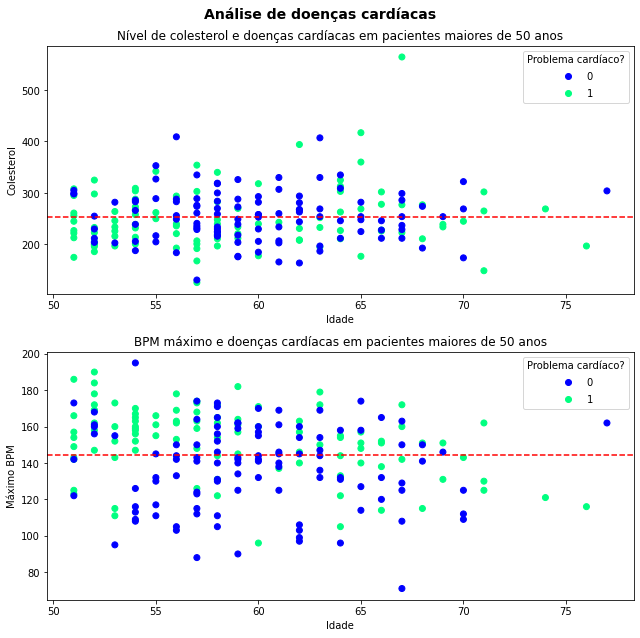

In [48]:
# plotando chol, age, thalach

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(9, 9))

sc = ax0.scatter(x=over_50['age'],
                 y=over_50['chol'],
                 c=over_50['target'],
                 cmap='winter')

ax0.set(title='Nível de colesterol e doenças cardíacas em pacientes maiores de 50 anos',
        ylabel='Colesterol',
        xlabel='Idade')
ax0.legend(*sc.legend_elements(), title='Problema cardíaco?')
ax0.axhline(over_50['chol'].mean(), linestyle='--', color='r')

sc2 = ax1.scatter(x=over_50['age'],
                  y=over_50['thalach'],
                  c=over_50['target'],
                  cmap='winter')

ax1.set(title='BPM máximo e doenças cardíacas em pacientes maiores de 50 anos',
        ylabel='Máximo BPM',
        xlabel='Idade')
ax1.legend(*sc2.legend_elements(), title='Problema cardíaco?')
ax1.axhline(over_50['thalach'].mean(), linestyle='--', color='r')

fig.suptitle('Análise de doenças cardíacas', fontweight='bold', fontsize='14')
fig.tight_layout()


## Usando estilos

Usar estilos padrões, como do seaborn, etc...

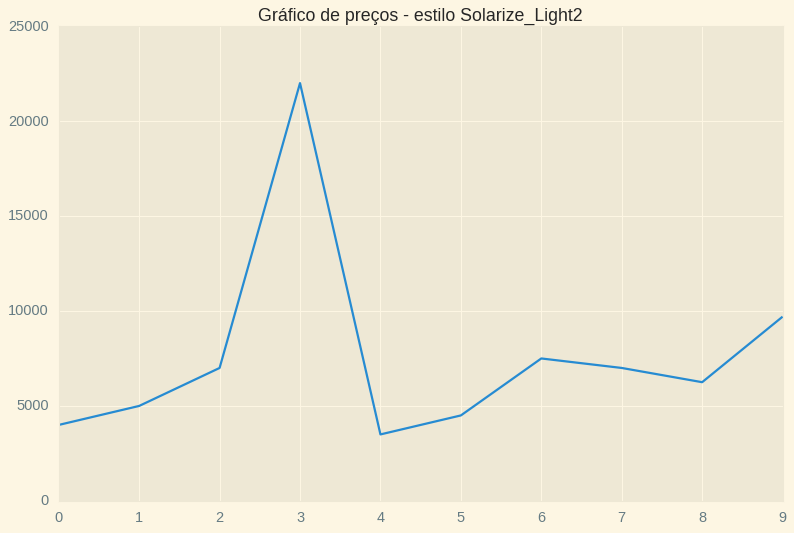

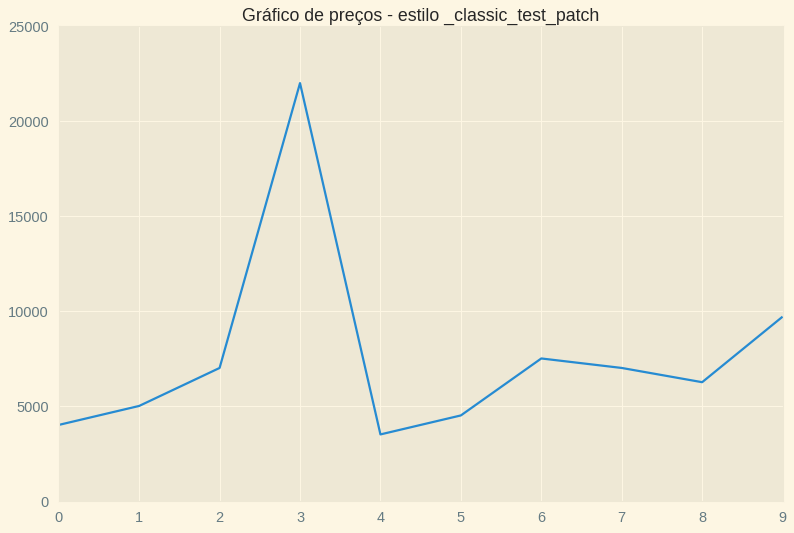

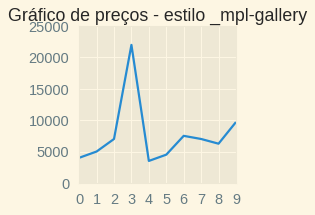

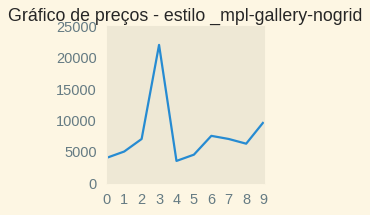

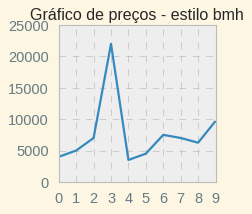

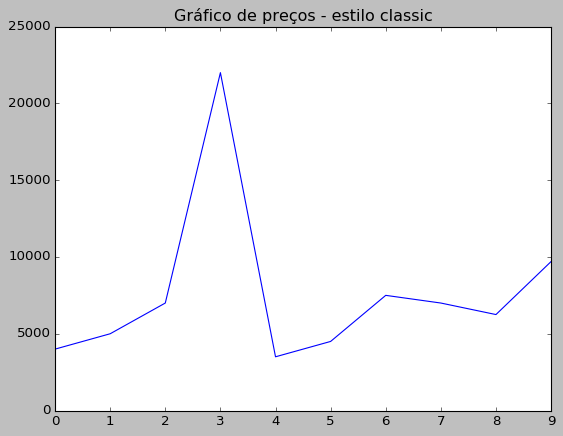

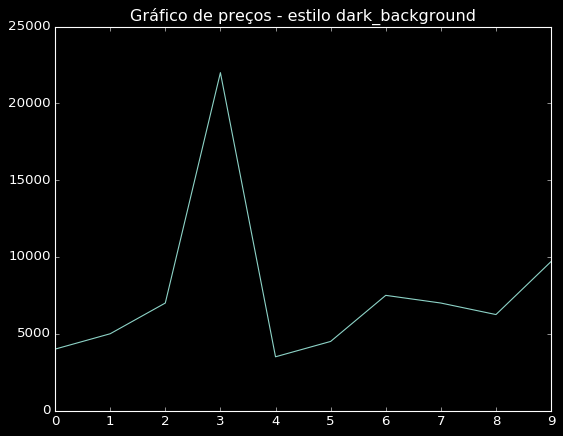

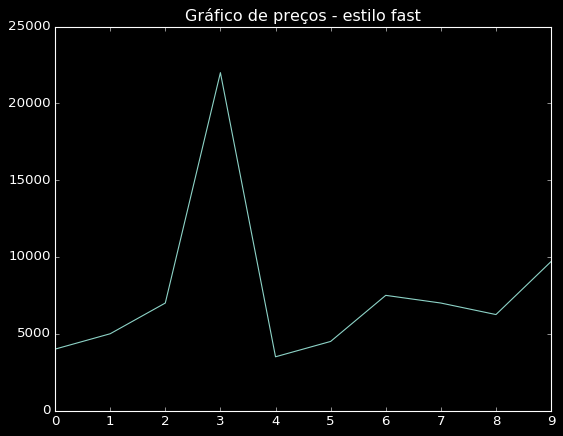

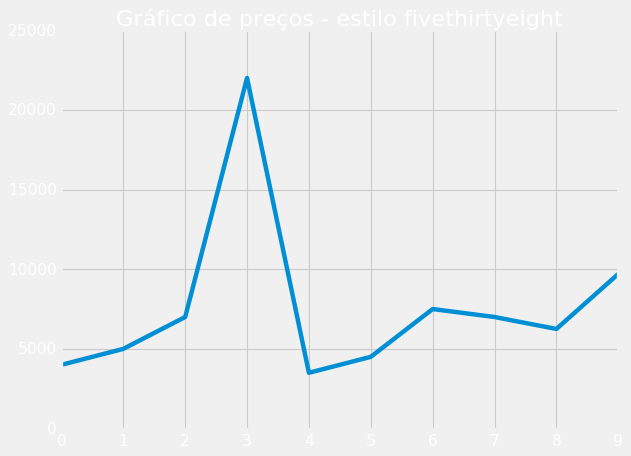

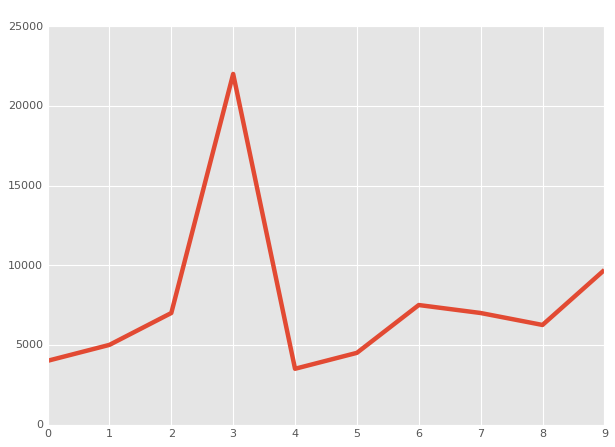

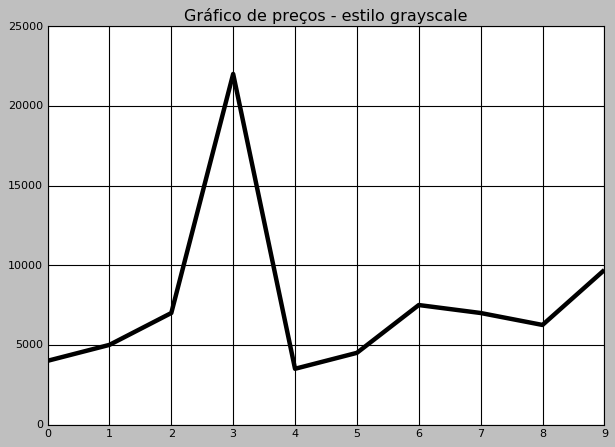

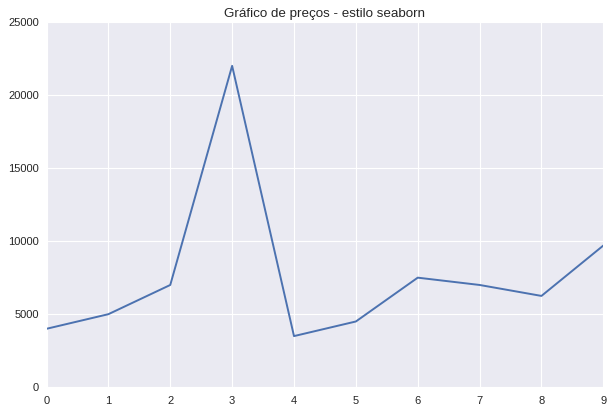

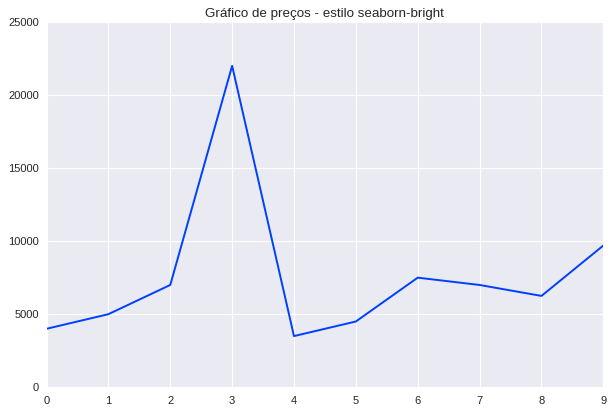

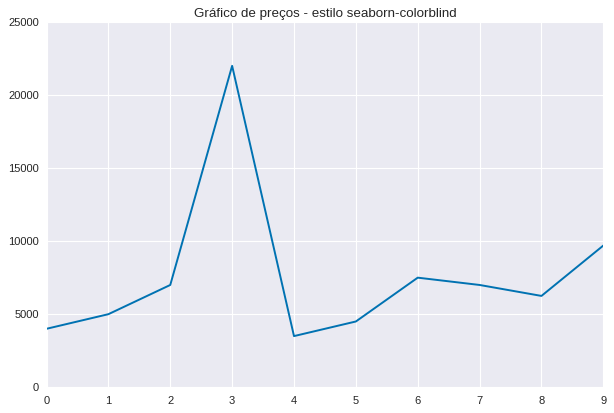

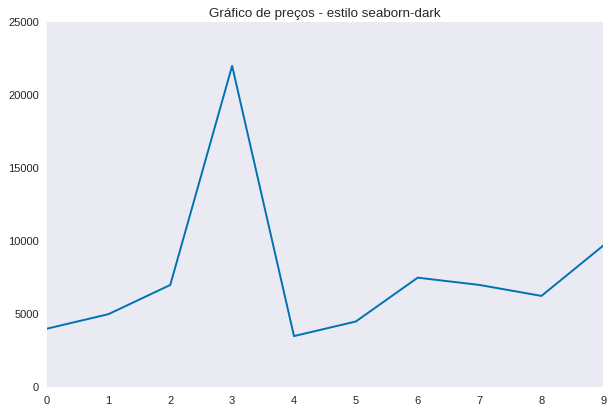

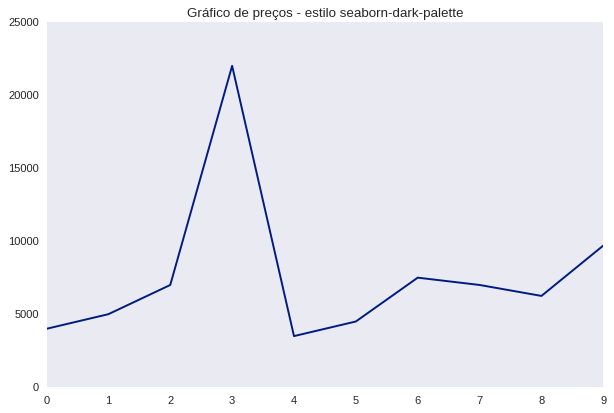

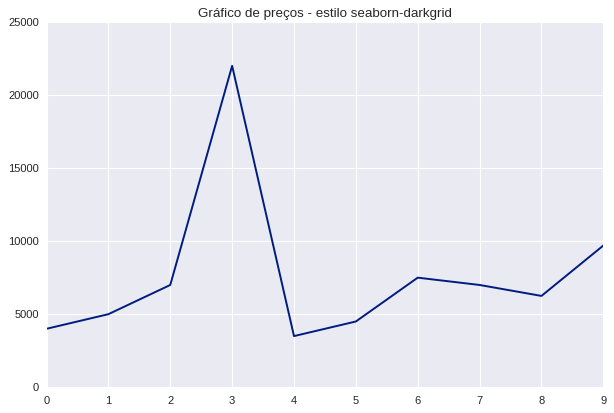

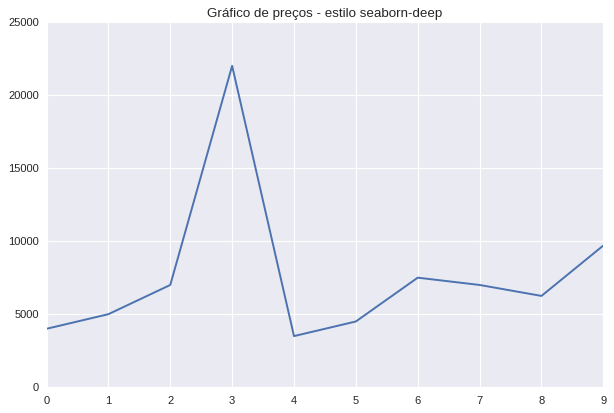

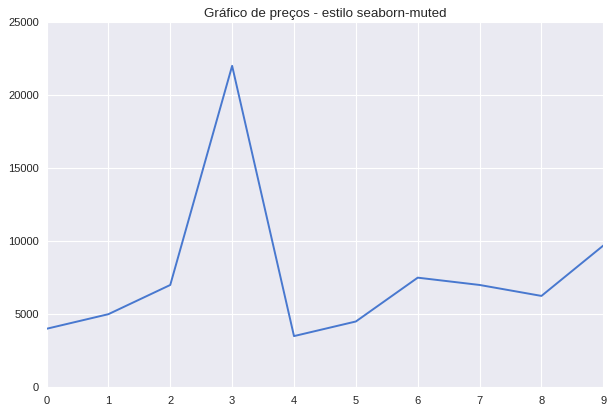

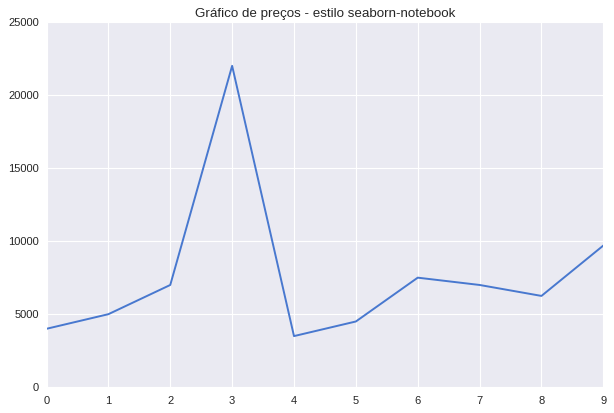

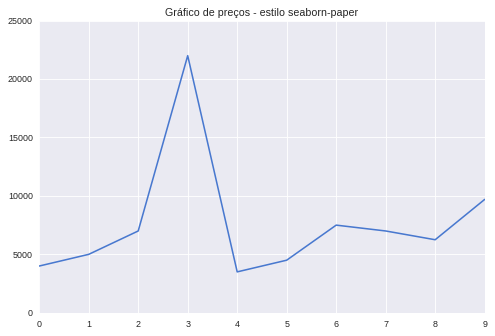

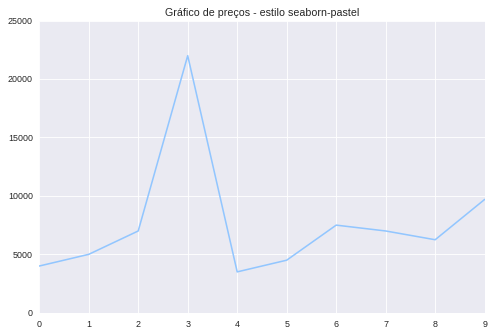

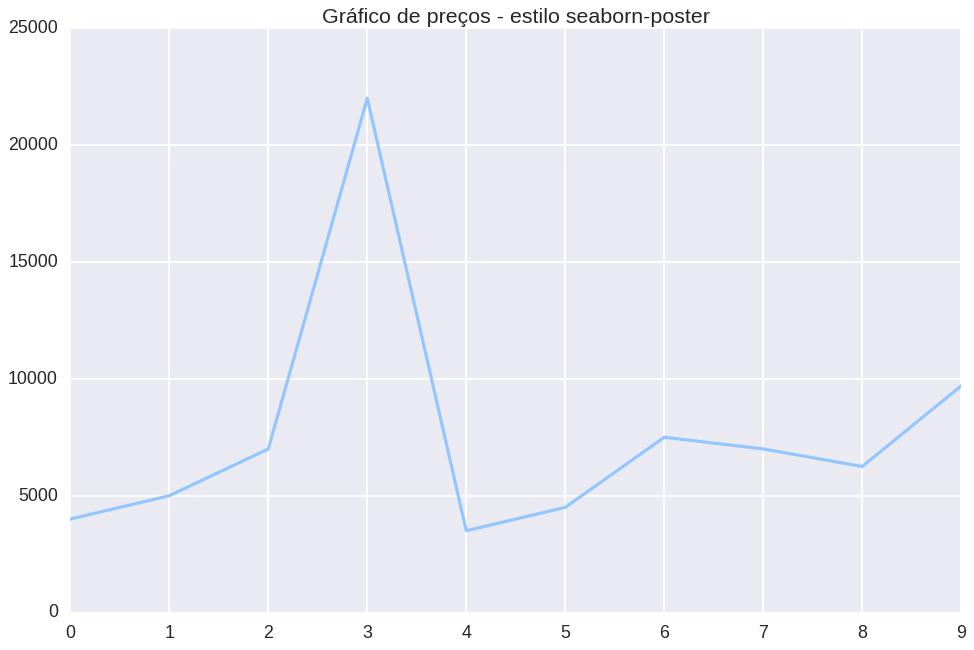

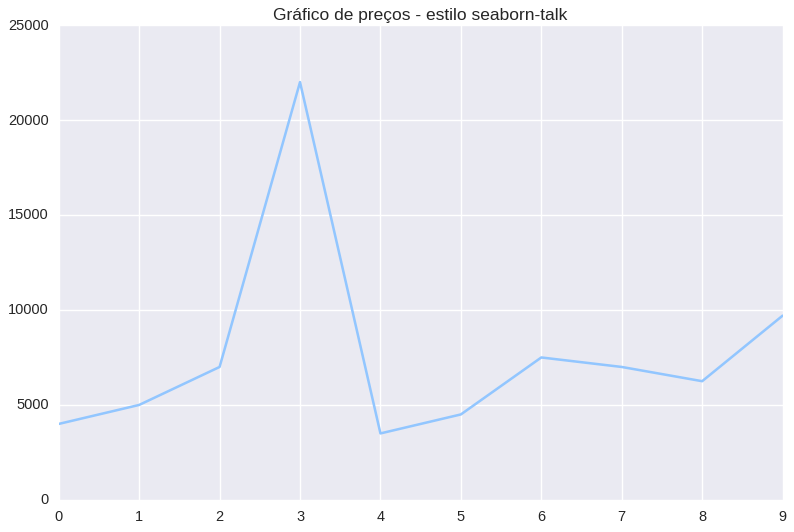

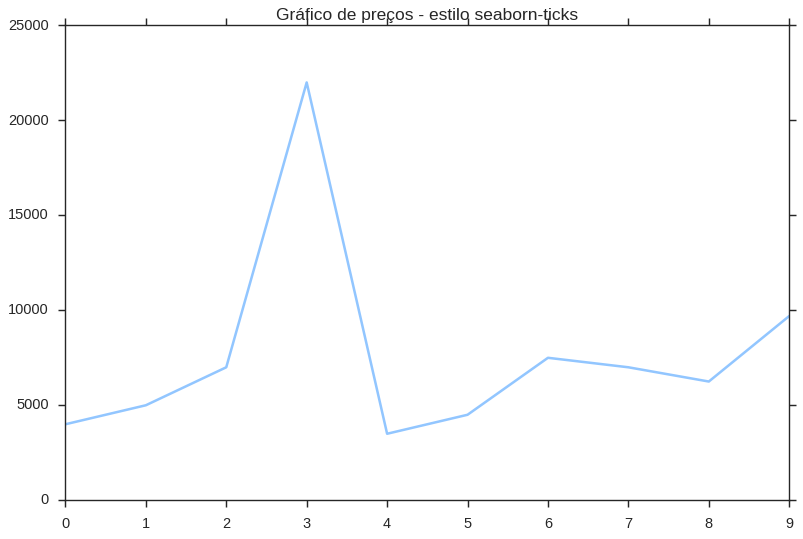

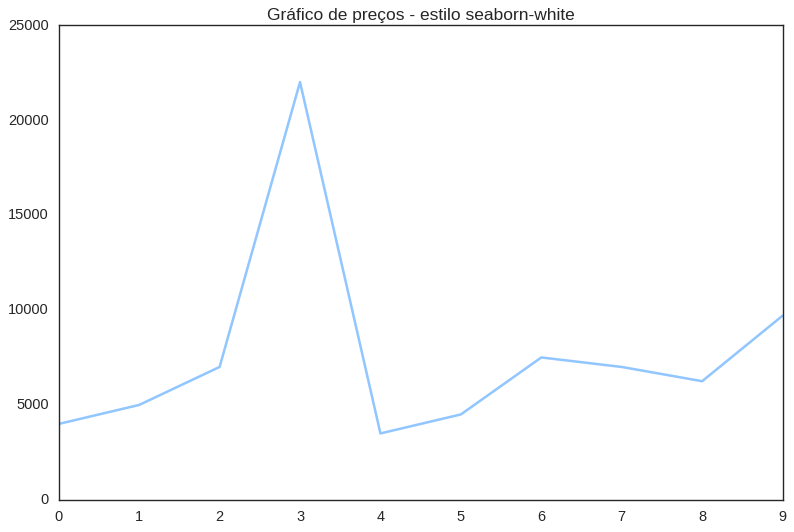

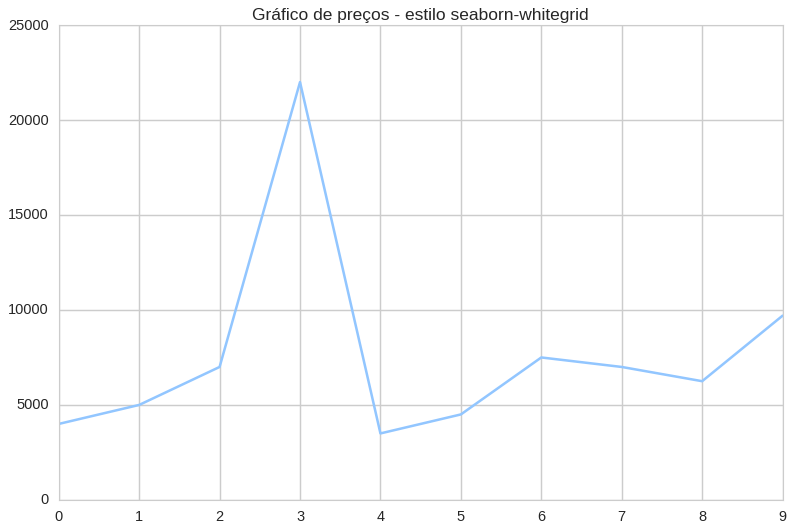

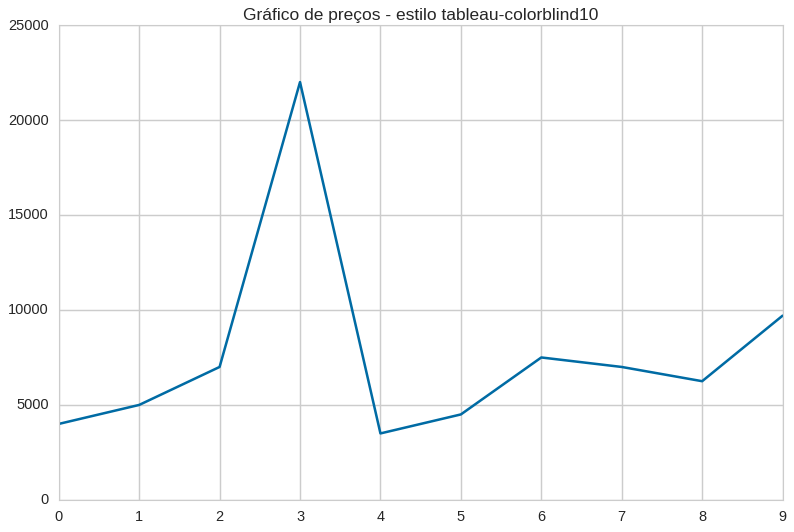

In [57]:
styles = plt.style.available

for i in styles:
    plt.style.use(i)
    plt.plot(car_sales['Price'])
    plt.title(f'Gráfico de preços - estilo {i}')
    plt.show()


<Figure size 832x572 with 0 Axes>

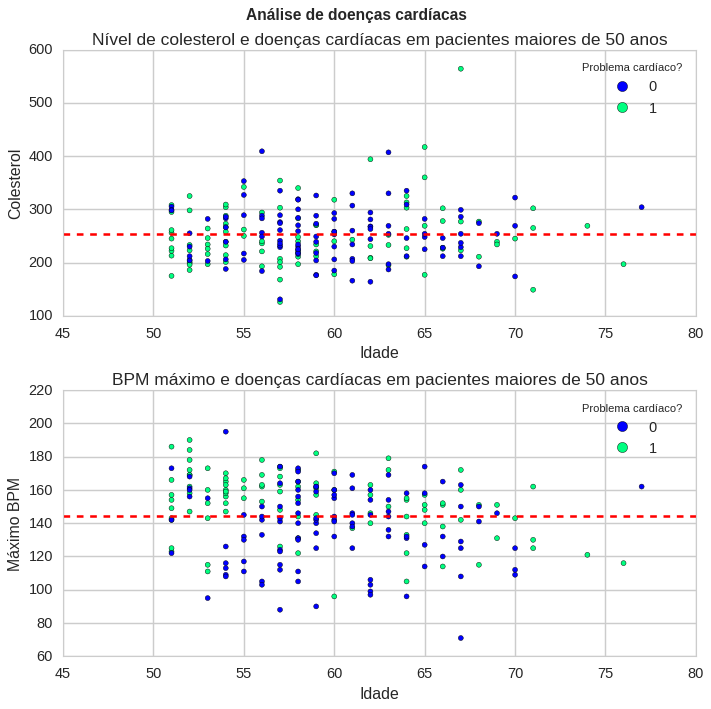

In [60]:
plt.clf()
plt.style.use('seaborn-whitegrid')

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(9, 9))

sc = ax0.scatter(x=over_50['age'],
                 y=over_50['chol'],
                 c=over_50['target'],
                 cmap='winter')

ax0.set(title='Nível de colesterol e doenças cardíacas em pacientes maiores de 50 anos',
        ylabel='Colesterol',
        xlabel='Idade')
ax0.legend(*sc.legend_elements(), title='Problema cardíaco?')
ax0.axhline(over_50['chol'].mean(), linestyle='--', color='r')

sc2 = ax1.scatter(x=over_50['age'],
                  y=over_50['thalach'],
                  c=over_50['target'],
                  cmap='winter')

ax1.set(title='BPM máximo e doenças cardíacas em pacientes maiores de 50 anos',
        ylabel='Máximo BPM',
        xlabel='Idade')
ax1.legend(*sc2.legend_elements(), title='Problema cardíaco?')
ax1.axhline(over_50['thalach'].mean(), linestyle='--', color='r')

fig.suptitle('Análise de doenças cardíacas', fontweight='bold', fontsize='14')
fig.tight_layout()
